In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the customer feedback dataset
df=pd.read_csv("/content/Netflix Userbase.csv")


In [3]:
df.head()


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [4]:
# Create a new column called 'Repeatpurchase'
df['Repeatpurchase'] = ''

In [9]:
# Convert date columns to datetime objects
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])

# Calculate the difference between 'Join Date' and 'Last Payment Date'
df['Date Difference'] = df['Last Payment Date'] - df['Join Date']


print(df)

      User ID Subscription Type  Monthly Revenue  Join Date Last Payment Date  \
0           1             Basic               10 2022-01-15        2023-10-06   
1           2           Premium               15 2021-05-09        2023-06-22   
2           3          Standard               12 2023-02-28        2023-06-27   
3           4          Standard               12 2022-10-07        2023-06-26   
4           5             Basic               10 2023-01-05        2023-06-28   
...       ...               ...              ...        ...               ...   
2495     2496           Premium               14 2022-07-25        2023-12-07   
2496     2497             Basic               15 2022-04-08        2023-07-14   
2497     2498          Standard               12 2022-09-08        2023-07-15   
2498     2499          Standard               13 2022-12-08        2023-12-07   
2499     2500             Basic               15 2022-08-13        2023-12-07   

             Country  Age  

In [11]:
if df['Date Difference'] > 30:
  df['Repeatpurchase'] = 'Yes'
else:
  df['Repeatpurchase'] = 'No'


TypeError: ignored

In [5]:
# For each row, calculate the difference between the 'Join Date' and 'Last Payment Date'
for index, row in df.iterrows():
  join_date = row['Join Date']
  last_payment_date = row['Last Payment Date']
  difference = last_payment_date - join_date


TypeError: ignored

In [6]:
df.isnull()


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Repeatpurchase
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2495,False,False,False,False,False,False,False,False,False,False,False
2496,False,False,False,False,False,False,False,False,False,False,False
2497,False,False,False,False,False,False,False,False,False,False,False
2498,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Grouped by age
df_grouped_by_age = df.groupby('Age')['User ID'].count()

In [ ]:
df.isnull().any()

User ID              False
Subscription Type    False
Monthly Revenue      False
Join Date            False
Last Payment Date    False
Country              False
Age                  False
Gender               False
Device               False
Plan Duration        False
dtype: bool

In [ ]:
df_grouped_by_age.head


<bound method NDFrame.head of Age
26      1
27     87
28    115
29    104
30    116
31    115
32     92
33     93
34     88
35    105
36     99
37    107
38     89
39    116
40    103
41    114
42    102
43     94
44     86
45     89
46     99
47    111
48    101
49     97
50     84
51     93
Name: User ID, dtype: int64>

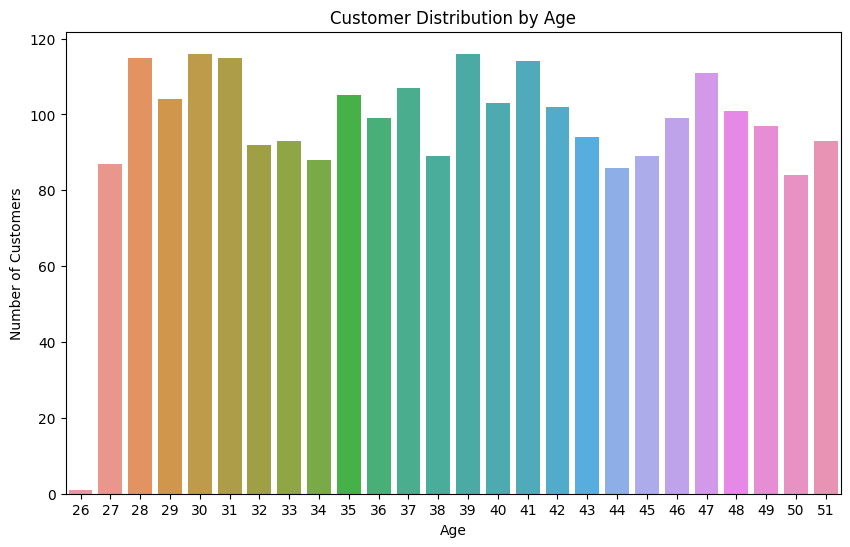

In [ ]:
# Create a bar plot of the customer distribution across age groups
plt.figure(figsize=(10, 6))
sns.barplot(x=df_grouped_by_age.index, y=df_grouped_by_age.values)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Age')
plt.show()

In [ ]:
# Convert categorical variables to numerical values
df['Gender_num'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Repeatpurchase_num'] = df['Repeatpurchase'].map({'Yes': 1, 'No': 0})
